# Lab 5. Plotting with Seaborn II

### We will continue our jounrey with SEaborn

## This session will cover:
1. Categorial data plotting with Seaborn
2. Jointplots
3. Heatmaps

## 0. Let's load some libraries


In [20]:
!pip install statsmodels 

     |████████████████████████████████| 9.8 MB 4.7 MB/s            
     |████████████████████████████████| 233 kB 90.9 MB/s            


In [1]:
import pandas as pd

In [2]:
### The matplotlib package is rather large since it encompasses quite a bit of functionality. Fortunately for us, for most of our plotting tasks, all we need is the pyplot module, which provides a MATLAB-like plotting framework
import matplotlib.pyplot as plt


In [49]:
import seaborn as sns
import statsmodels
import numpy as np

## 1. Let's load some data



### Tips dataset

### For this lab we will use a simple, yet realistic, dataset about business activity at a restaurant.
### Each row in the dataset provides information on the number of customers served, total bill, tip, smoking habits, day and time.

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## 2. Analysis of categorical data

#### Econometric and policy making analysis oftentimes requires the analysis of categorical variables (e.g. gender, age). Seaborn provides convenient tools to visualize categorical information

### 2.1. Box Plots

Text(0, 0.5, 'Total Bill')

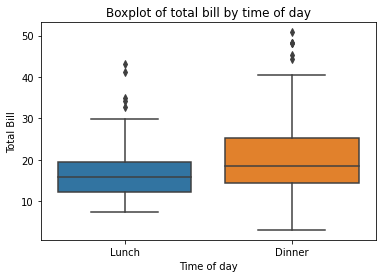

In [6]:
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

### Dinners seem to be more profitable

### 2.2. Violin Plots

Text(0, 0.5, 'Total Bill')

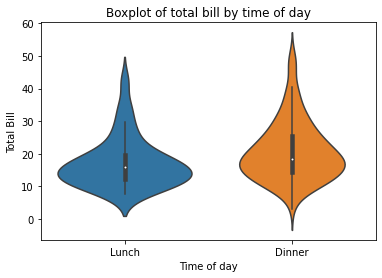

In [7]:
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

### 2.3. Bar Plots

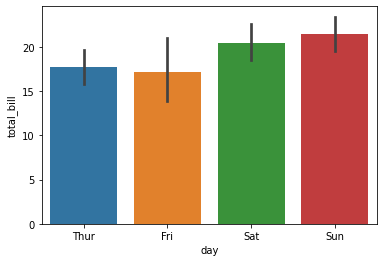

In [8]:
ax = sns.barplot(x="day", y="total_bill", data=tips)

In [9]:
### It seems that weekends are the busy days

## 3. Multidimensional analysis of categorical data

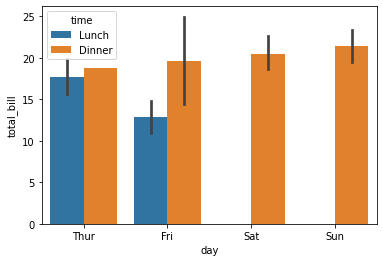

In [10]:
ax = sns.barplot(x="day", y="total_bill", data=tips,hue='time')

### Should the restaurant offer lunch services on weekends ?

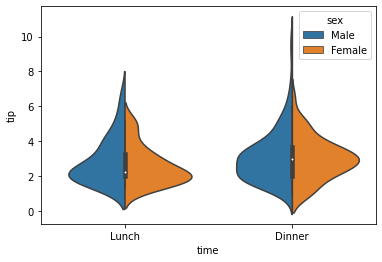

In [11]:
ax = sns.violinplot(x='time', y='tip',hue='sex', data=tips,split=True)

### Tips tend to be larger at dinner time. Gender does not seem to be significant

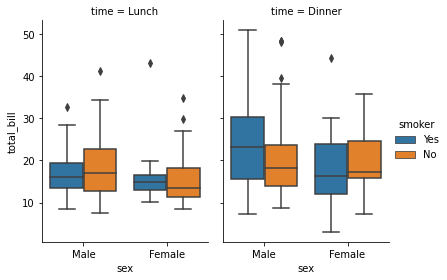

In [16]:
sns.catplot(x="sex", y="total_bill",
                hue="smoker", col="time",
                data=tips, kind="box",
                height=4, aspect=.7);

## 4. Regression analysis

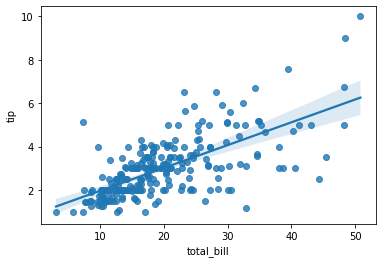

In [17]:
sns.regplot(x="total_bill", y="tip", data=tips);


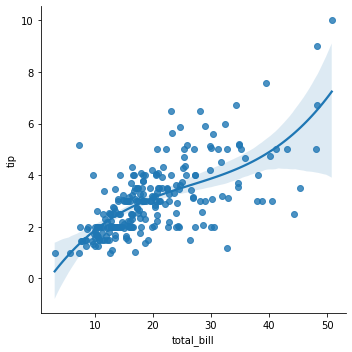

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           order=3);

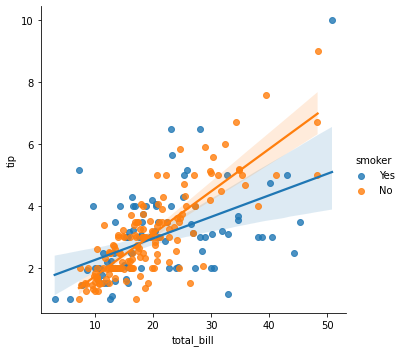

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

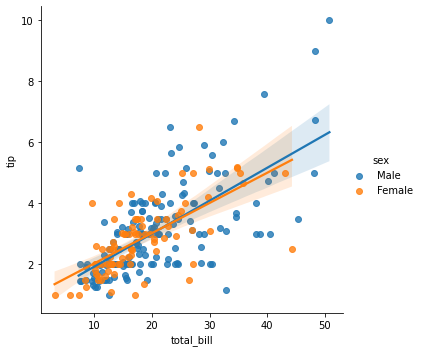

In [26]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips);

## 5. Correlation analysis

In [48]:
tips[['total_bill','tip','size']].head(4)

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2


In [43]:
# Compute the correlation matrix
corr=tips[['total_bill','tip','size']].corr()

In [52]:
corr

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


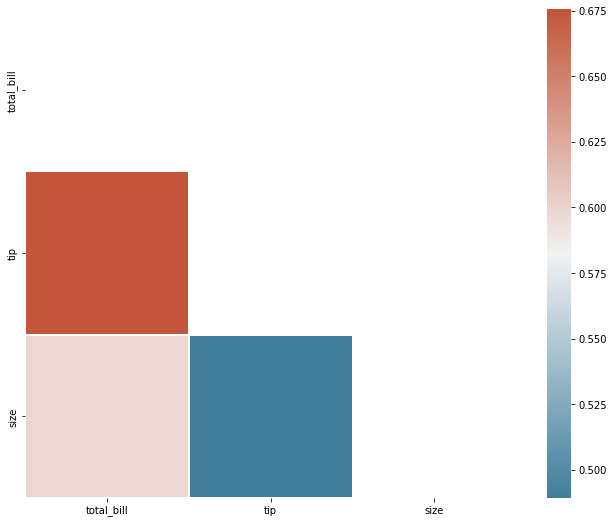

In [51]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, 
             linewidths=.5, )

#### There is some weak correlation between total bill and tip